In [8]:
from requests_html import HTMLSession
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
session = HTMLSession()

# get the webpage using HTMLSession
r = session.get('https://news.google.com/topstories?hl=en-US&gl=US&ceid=US:en')

# render the site, give scrapper one second to scrape before moving on via sleep = 1
# scroll down the page 5 times via scrolldown = 5
r.html.render(sleep=1, scrolldown=6)

# find all the articles using inspect element, create lists for titles, links, and both combined
articles = r.html.find('article')

titles = []  # stores all article titles
links = []  # stores all article links
newslist = []  # stores both

# loop through each article to find the title and link.
# using try and except due to different h tags.
for item in articles:
    try:
        newsitem = item.find('h3', first=True)
        title = newsitem.text
        link = newsitem.absolute_links
        newsarticle = {
            'title': title,
            'link': link 
        }
        titles.append(title)
        links.append(link)
        newslist.append(newsarticle)
    except:
       pass

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

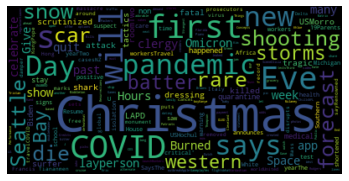

In [10]:
def list_to_string(titles):
    string1 = ""
    for ele in titles:
        string1 += ele

    return string1

a = list_to_string(titles)
words = WordCloud().generate(a)
plt.imshow(words, interpolation='bilinear')
plt.axis('off')
plt.show()